<a href="https://colab.research.google.com/github/nikhilbordekar/8-Week-SQL-Challenge/blob/main/8_Weeks_SQL_Challenge_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY #1 DANNY'S DINER**

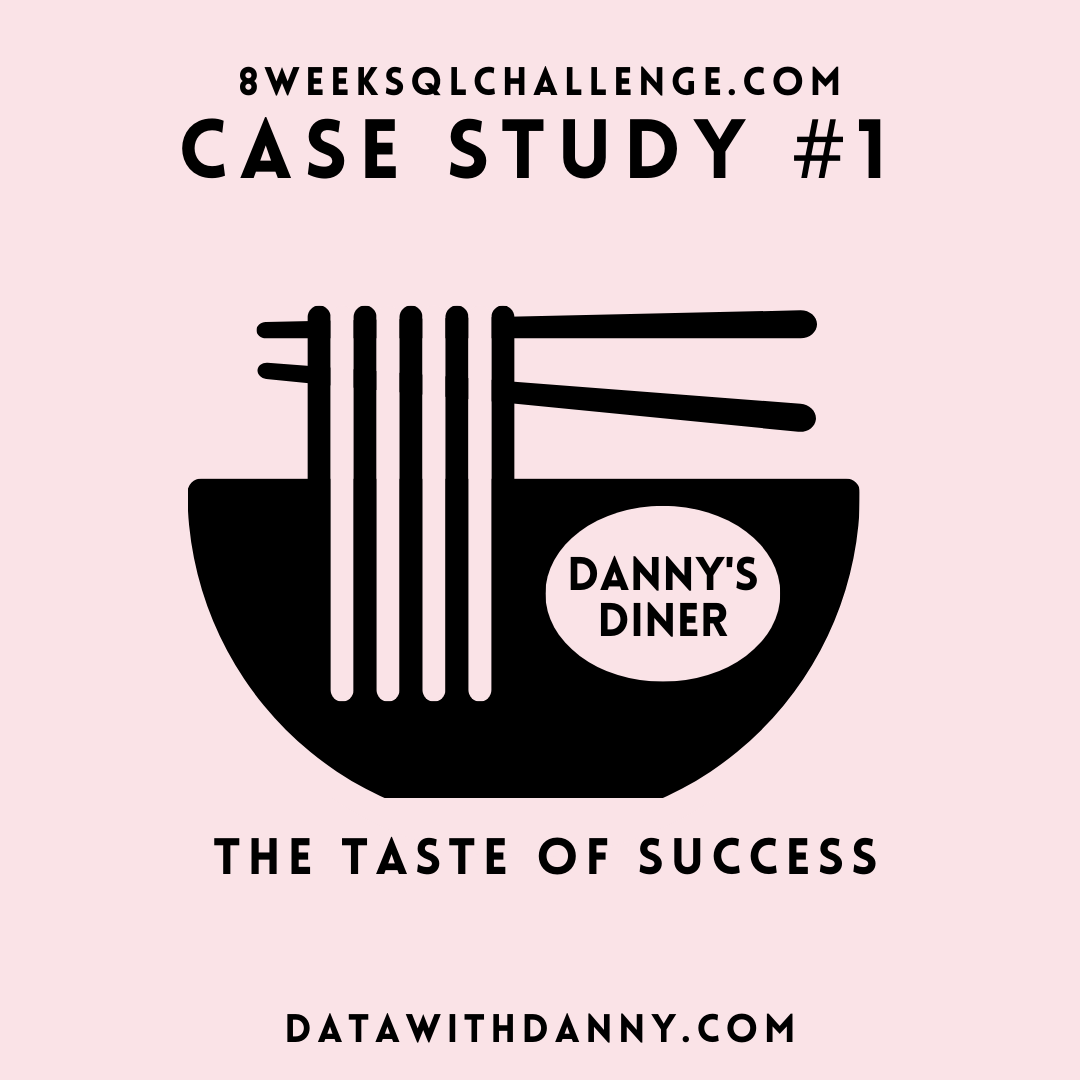

**Introduction**

Danny seriously loves Japanese food so in the beginning of 2021, he decides to embark upon a risky venture and opens up a cute little restaurant that sells his 3 favourite foods: sushi, curry and ramen.

Danny’s Diner is in need of your assistance to help the restaurant stay afloat - the restaurant has captured some very basic data from their few months of operation but have no idea how to use their data to help them run the business.

**Problem Statement**

Danny wants to use the data to answer a few simple questions about his customers, especially about their visiting patterns, how much money they’ve spent and also which menu items are their favourite. Having this deeper connection with his customers will help him deliver a better and more personalised experience for his loyal customers.

He plans on using these insights to help him decide whether he should expand the existing customer loyalty program - additionally he needs help to generate some basic datasets so his team can easily inspect the data without needing to use SQL.

Danny has provided you with a sample of his overall customer data due to privacy issues - but he hopes that these examples are enough for you to write fully functioning SQL queries to help him answer his questions!

Danny has shared with you 3 key datasets for this case study:


*   sales
*   menu
*   members








You can inspect the entity relationship diagram and example data below.

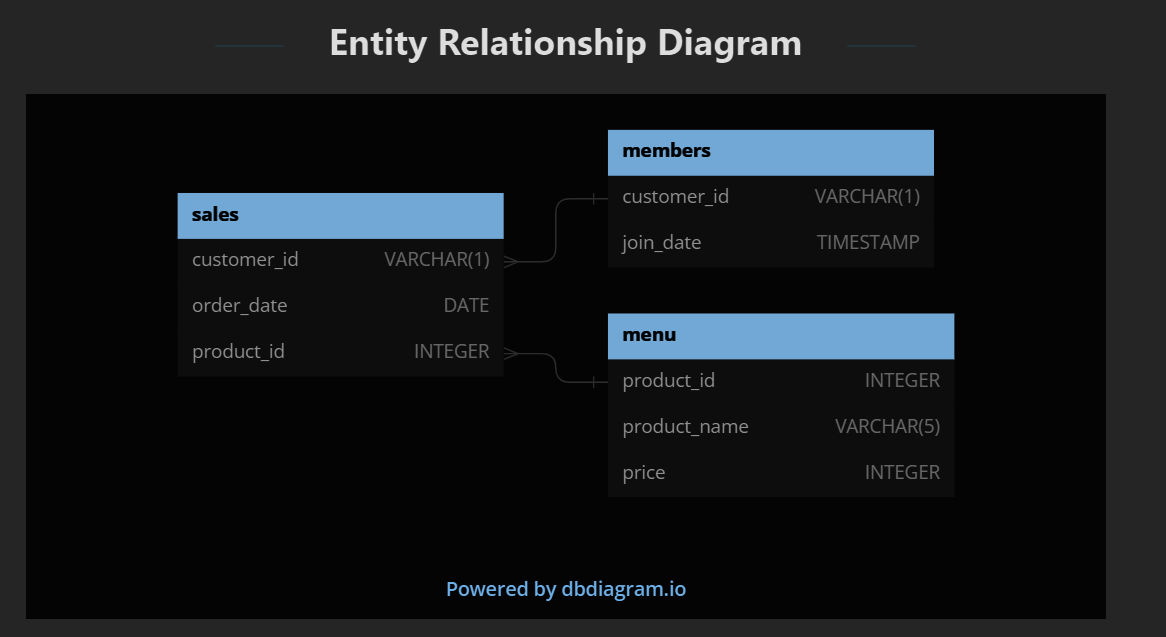

### **Table 1: sales**
The sales table captures all customer_id level purchases with an corresponding order_date and product_id information for when and what menu items were ordered.

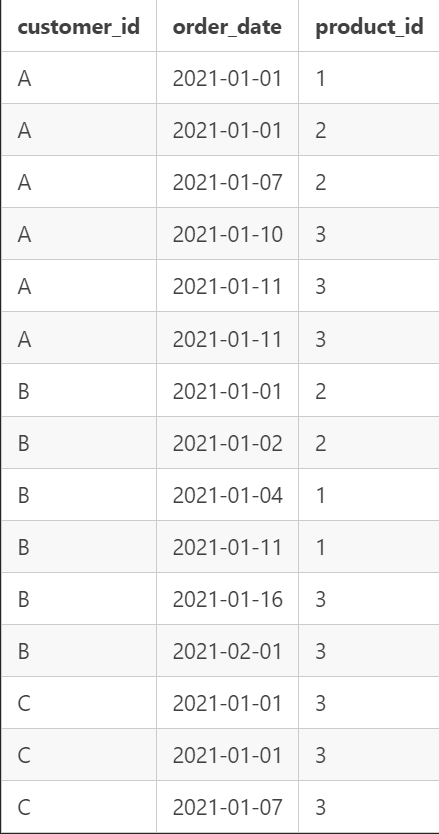

### **Table 2: menu**
The menu table maps the product_id to the actual product_name and price of each menu item.

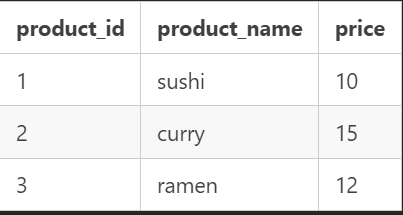

### **Table 3: members**

The final members table captures the join_date when a customer_id joined the beta version of the Danny’s Diner loyalty program.

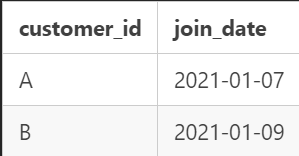

```sql
CREATE SCHEMA dannys_diner;
SET search_path = dannys_diner;

CREATE TABLE sales (
  "customer_id" VARCHAR(1),
  "order_date" DATE,
  "product_id" INTEGER
);

INSERT INTO sales
  ("customer_id", "order_date", "product_id")
VALUES
  ('A', '2021-01-01', '1'),
  ('A', '2021-01-01', '2'),
  ('A', '2021-01-07', '2'),
  ('A', '2021-01-10', '3'),
  ('A', '2021-01-11', '3'),
  ('A', '2021-01-11', '3'),
  ('B', '2021-01-01', '2'),
  ('B', '2021-01-02', '2'),
  ('B', '2021-01-04', '1'),
  ('B', '2021-01-11', '1'),
  ('B', '2021-01-16', '3'),
  ('B', '2021-02-01', '3'),
  ('C', '2021-01-01', '3'),
  ('C', '2021-01-01', '3'),
  ('C', '2021-01-07', '3');


CREATE TABLE menu (
  "product_id" INTEGER,
  "product_name" VARCHAR(5),
  "price" INTEGER
);

INSERT INTO menu
  ("product_id", "product_name", "price")
VALUES
  ('1', 'sushi', '10'),
  ('2', 'curry', '15'),
  ('3', 'ramen', '12');
  

CREATE TABLE members (
  "customer_id" VARCHAR(1),
  "join_date" DATE
);

INSERT INTO members
  ("customer_id", "join_date")
VALUES
  ('A', '2021-01-07'),
  ('B', '2021-01-09');
  ```

## **Case Study Questions**

**1. What is the total amount each customer spent at the restaurant?**

```sql
select
      s.customer_id,
      sum(m.price) as total_spent
from menu m
join sales s on s.product_id = m.product_id
group by 1
order by 1
```

**2. How many days has each customer visited the restaurant?**

```sql
select
      customer_id,
      count(distinct(order_date)) as Count_of_visits
from sales
group by customer_id
```


**3. What was the first item from the menu purchased by each customer?**

```sql
WITH ordered_sales AS (
	select
	s.customer_id,
	m.product_name,
	s.order_date,
	dense_rank() over(
		partition by s.customer_id
		order by s.order_date asc) as sequence_
from sales s
join menu m on m.product_id = s.product_id
)

SELECT
  customer_id,
  product_name
FROM ordered_sales
WHERE sequence_ = 1
GROUP BY customer_id, product_name;
```

**4. What is the most purchased item on the menu and how many times was it purchased by all customers?**

```sql
select
      m.product_name,
      count(s.product_id) as Frequency from menu m
join sales s on s.product_id = m.product_id
group by 1
```


**5. Which item was the most popular for each customer?**

```sql
WITH most_popular AS (
  SELECT
    s.customer_id,
    m.product_name,
    COUNT(m.product_id) AS order_count,
    DENSE_RANK() OVER (
      PARTITION BY s.customer_id
      ORDER BY COUNT(s.customer_id) DESC) AS rank
  FROM menu m
  INNER JOIN sales s
    ON m.product_id = s.product_id
  GROUP BY s.customer_id, m.product_name
)

SELECT
  customer_id,
  product_name,
  order_count
FROM most_popular
WHERE rank = 1;
```

**6. Which item was purchased first by the customer after they became a member?**

```sql
WITH first_product AS (
	select
	s.customer_id,
	m.product_name,
	mm.join_date,
	s.order_date,
	DENSE_RANK() over(
	partition by s.customer_id order by s.order_date asc) as rank
	from members mm
join sales s on s.customer_id = mm.customer_id
join menu m on s.product_id = m.product_id
where s.order_date > mm.join_date
)

select customer_id, product_name from first_product
where rank =1
```